Business problem overview
=============================
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 

Understanding and defining churn
==================================
There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).
In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.
However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).
Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.
This project is based on the Indian and Southeast Asian market.

Definitions of churn
======================
There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.
The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, you will use the usage-based definition to define churn.

High-value churn
=================
In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.


Understanding the business objective and the data
====================================================
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

 

Understanding customer behaviour during churn
================================================
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.
The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)
The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

Data Preparation
====================
The following data preparation steps are crucial for this problem:
1. Derive new features
This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.
2. Filter high-value customers
As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
After filtering the high-value customers, you should get about 29.9k rows.
3. Tag churners and remove attributes of the churn phase
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
total_ic_mou_9
total_og_mou_9
vol_2g_mb_9
vol_3g_mb_9
After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

 
Modelling
==============
Build models to predict churn. The predictive model that you’re going to build will serve two purposes:
It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.
It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

In some cases, both of the above-stated goals can be achieved by a single machine learning model. But here, you have a large number of attributes, and thus you should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, you can use any classification model.
Also, since the rate of churn is typically low (about 5-10%, this is called class-imbalance) - try using techniques to handle class imbalance. 
You can take the following suggestive steps to build the model:
1) Preprocess data (convert columns to appropriate formats, handle missing values, etc.)
2) Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).
3) Derive new features.
4) Reduce the number of variables using PCA.
5) Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).
6) Evaluate the models using appropriate evaluation metrics. Note that it is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.
7) Finally, choose a model based on some evaluation metric.

The above model will only be able to achieve one of the two goals - to predict customers who will churn. You can’t use the above model to identify the important features for churn. That’s because PCA usually creates components which are not easy to interpret.

Therefore, build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a logistic regression model or a model from the tree family. In case of logistic regression, make sure to handle multi-collinearity.

After identifying important predictors, display them visually - you can use plots, summary tables etc. - whatever you think best conveys the importance of features.

Finally, recommend strategies to manage customer churn based on your observations. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as stm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
pd.set_option('display.max_columns',250)
pd.set_option('display.max_rows',250)

### Importing the file

In [2]:
telecom_churn_data = pd.read_csv(r'C:\Users\priya\Documents\ML algorithms\Time Series Forecasting\Case Study\telecom_churn_data.csv')
telecom_churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
telecom_churn_data.shape

(99999, 226)

## Data Cleaning

In [4]:
date_obj_cols = telecom_churn_data.select_dtypes('object').columns

In [5]:
id_cols = ['mobile_number', 'circle_id']

### Handling Missing Values

In [6]:
(100*telecom_churn_data.isnull().sum() / telecom_churn_data.shape[0]).sort_values(ascending=False)

count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
total_rech_data_6           74.846748
arpu_3g_6                   74.846748
arpu_2g_6                   74.846748
night_pck_user_6            74.846748
fb_user_6                   74.846748
arpu_3g_7                   74.428744
count_rech_2g_7             74.428744
fb_user_7                   74.428744
count_rech_3g_7             74.428744
arpu_2g_7                   74.428744
av_rech_amt_data_7          74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
total_rech_data_7           74.428744
date_of_last_rech_data_7    74.428744
night_pck_user_9            74.077741
date_of_last_rech_data_9    74.077741
fb_user_9                   74.077741
arpu_2g_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
total_rech_d

#### Highly missing :
- We can see that below columns have high percentage of missing values and
- and the percentage for all the columns is same for each months
- All the columns related to data recharge are null where the last date of data rechard is null
- Hence, the columns related to data recharge can be imputed with 0 as clearly no data recharge has been done
-- count_rech_3g_6, av_rech_amt_data_6, count_rech_2g_6, max_rech_data_6, total_rech_data_6, 
-- count_rech_3g_7, av_rech_amt_data_7, count_rech_2g_7, max_rech_data_7, total_rech_data_7,
-- count_rech_3g_8, av_rech_amt_data_8, count_rech_2g_8, max_rech_data_8, total_rech_data_8,
-- count_rech_3g_9, av_rech_amt_data_9, count_rech_2g_9, max_rech_data_9, total_rech_data_9

In [7]:
rech_cols = ['count_rech_3g_6', 'av_rech_amt_data_6', 'count_rech_2g_6', 'max_rech_data_6', 'total_rech_data_6', 
             'count_rech_3g_7', 'av_rech_amt_data_7', 'count_rech_2g_7', 'max_rech_data_7', 'total_rech_data_7', 
             'count_rech_3g_8', 'av_rech_amt_data_8', 'count_rech_2g_8', 'max_rech_data_8', 'total_rech_data_8',
             'count_rech_3g_9', 'av_rech_amt_data_9', 'count_rech_2g_9', 'max_rech_data_9', 'total_rech_data_9']

telecom_churn_data[rech_cols]=telecom_churn_data[rech_cols].fillna(0)

In [8]:
(100*telecom_churn_data.isnull().sum() / telecom_churn_data.shape[0]).sort_values(ascending=False)

date_of_last_rech_data_6    74.846748
arpu_2g_6                   74.846748
night_pck_user_6            74.846748
fb_user_6                   74.846748
arpu_3g_6                   74.846748
date_of_last_rech_data_7    74.428744
night_pck_user_7            74.428744
fb_user_7                   74.428744
arpu_3g_7                   74.428744
arpu_2g_7                   74.428744
night_pck_user_9            74.077741
arpu_2g_9                   74.077741
arpu_3g_9                   74.077741
fb_user_9                   74.077741
date_of_last_rech_data_9    74.077741
arpu_3g_8                   73.660737
arpu_2g_8                   73.660737
fb_user_8                   73.660737
night_pck_user_8            73.660737
date_of_last_rech_data_8    73.660737
loc_og_t2c_mou_9             7.745077
loc_og_t2f_mou_9             7.745077
loc_og_t2m_mou_9             7.745077
loc_ic_t2m_mou_9             7.745077
std_ic_t2f_mou_9             7.745077
roam_og_mou_9                7.745077
loc_og_mou_9

### Dropping the date and id columns as they are not required for analaysis purpose

In [9]:
telecom_churn_data.drop(date_obj_cols, axis=1, inplace=True)
telecom_churn_data.drop(id_cols, axis=1, inplace=True)
telecom_churn_data.shape

(99999, 212)

In [10]:
(100*telecom_churn_data.isnull().sum() / telecom_churn_data.shape[0]).sort_values(ascending=False)

arpu_2g_6             74.846748
night_pck_user_6      74.846748
fb_user_6             74.846748
arpu_3g_6             74.846748
arpu_2g_7             74.428744
night_pck_user_7      74.428744
fb_user_7             74.428744
arpu_3g_7             74.428744
arpu_2g_9             74.077741
fb_user_9             74.077741
night_pck_user_9      74.077741
arpu_3g_9             74.077741
night_pck_user_8      73.660737
arpu_3g_8             73.660737
arpu_2g_8             73.660737
fb_user_8             73.660737
loc_og_t2f_mou_9       7.745077
spl_ic_mou_9           7.745077
loc_og_t2m_mou_9       7.745077
spl_og_mou_9           7.745077
loc_og_t2t_mou_9       7.745077
std_ic_mou_9           7.745077
ic_others_9            7.745077
isd_og_mou_9           7.745077
loc_og_t2c_mou_9       7.745077
std_og_mou_9           7.745077
loc_og_mou_9           7.745077
std_og_t2c_mou_9       7.745077
og_others_9            7.745077
std_og_t2t_mou_9       7.745077
isd_ic_mou_9           7.745077
std_og_t

### Dropping columns having more than 50% missing values

In [11]:
null_chk = pd.DataFrame((100*telecom_churn_data.isnull().sum() / telecom_churn_data.shape[0]) > 50)
null_chk=null_chk.reset_index()
null_chk.columns = ['Features', 'null']
cols = null_chk[null_chk.null == True].Features
telecom_churn_data.drop(cols, axis=1, inplace=True)
telecom_churn_data.shape

(99999, 196)

### Dropping columns where values are skewed

In [12]:
skwd_cols=[]
for i in telecom_churn_data.columns:
    if telecom_churn_data[i].nunique() == 1:
        skwd_cols.append(i)

print(skwd_cols)
telecom_churn_data.drop(skwd_cols, axis=1, inplace = True)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [13]:
telecom_churn_data.shape

(99999, 185)

In [14]:
(100*telecom_churn_data.isnull().sum() / telecom_churn_data.shape[0]).sort_values(ascending=False)

ic_others_9           7.745077
roam_og_mou_9         7.745077
isd_og_mou_9          7.745077
loc_og_t2t_mou_9      7.745077
std_ic_t2t_mou_9      7.745077
std_og_mou_9          7.745077
std_ic_t2m_mou_9      7.745077
loc_og_t2f_mou_9      7.745077
loc_og_t2c_mou_9      7.745077
std_ic_t2f_mou_9      7.745077
loc_og_mou_9          7.745077
std_ic_mou_9          7.745077
std_og_t2t_mou_9      7.745077
og_others_9           7.745077
std_og_t2m_mou_9      7.745077
std_og_t2f_mou_9      7.745077
spl_ic_mou_9          7.745077
loc_ic_mou_9          7.745077
loc_og_t2m_mou_9      7.745077
loc_ic_t2m_mou_9      7.745077
spl_og_mou_9          7.745077
offnet_mou_9          7.745077
loc_ic_t2f_mou_9      7.745077
loc_ic_t2t_mou_9      7.745077
roam_ic_mou_9         7.745077
isd_ic_mou_9          7.745077
onnet_mou_9           7.745077
spl_ic_mou_8          5.378054
loc_ic_t2t_mou_8      5.378054
std_og_t2f_mou_8      5.378054
isd_ic_mou_8          5.378054
loc_og_mou_8          5.378054
std_og_t

### Using KNN imputer to impute the missing values in numerical columns

In [15]:
numerical_cols = telecom_churn_data.select_dtypes(include = ['int64','float64']).columns.tolist()
scaler = MinMaxScaler()
telecom_churn_data[numerical_cols] = scaler.fit_transform(telecom_churn_data[numerical_cols])
knn_imputer = KNNImputer(n_neighbors=3)
telecom_churn_data_knn = pd.DataFrame(knn_imputer.fit_transform(telecom_churn_data[numerical_cols]), columns = telecom_churn_data[numerical_cols].columns)
telecom_churn_data_knn.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.081898,0.059980,0.033622,0.047183,0.005041,0.002497,0.000000,0.001790,0.001663,0.001114,0.000000,0.001364,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.005782,0.002753,0.000000,0.001759,0.002489,0.001362,0.000000,0.002707,0.000086,0.003731,0.000000,0.002239,0.0,0.000000,0.000000,0.000716,0.004612,0.004046,0.000000,0.002914,0.000000,0.000000,0.000000,0.000041,0.000000,0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000009,0.000000,0.000033,0.0,0.0,0.0,0.0,0.001961,0.000138,0.000000,0.000406,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.003713,0.000743,0.000015,0.000737,0.009145,0.004942,0.000658,0.002616,0.002756,0.002175,0.000473,0.000499,0.009753,0.003440,0.000502,0.002247,0.000000,0.000580,0.000000,0.000000,0.000397,0.000074,0.000000,0.000191,0.000000,0.000000,0.000000,0.000270,0.000393,0.000566,0.000000,0.000248,0.000000,0.000000,0.000502,0.000000,0.004723,0.001563,0.0,0.001496,0.00000,0.000000,0.0,0.000000,0.000000,0.000368,0.0,0.000136,0.013029,0.021739,0.010204,0.045802,0.010287,0.006248,0.005560,0.000000,0.062843,0.062843,0.056642,0.00000,0.062843,0.062843,0.056642,0.000000,0.016393,0.018519,0.016667,0.000000,0.162058,0.162058,0.162058,0.000000,0.00000,0.000000,0.000000,0.000,0.034483,0.028571,0.022222,0.

In [16]:
telecom_churn_data[numerical_cols]=scaler.inverse_transform(telecom_churn_data_knn)

In [17]:
(100*telecom_churn_data.isnull().sum() / telecom_churn_data.shape[0]).sort_values(ascending=False)

sep_vbc_3g            0.0
isd_og_mou_7          0.0
og_others_8           0.0
og_others_7           0.0
og_others_6           0.0
spl_og_mou_9          0.0
spl_og_mou_8          0.0
spl_og_mou_7          0.0
spl_og_mou_6          0.0
isd_og_mou_9          0.0
isd_og_mou_8          0.0
isd_og_mou_6          0.0
std_ic_t2t_mou_9      0.0
std_og_mou_9          0.0
std_og_mou_8          0.0
std_og_mou_7          0.0
std_og_mou_6          0.0
std_og_t2f_mou_9      0.0
std_og_t2f_mou_8      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_mou_6      0.0
std_og_t2m_mou_9      0.0
og_others_9           0.0
total_og_mou_6        0.0
total_og_mou_7        0.0
total_og_mou_8        0.0
std_ic_t2t_mou_7      0.0
std_ic_t2t_mou_6      0.0
loc_ic_mou_9          0.0
loc_ic_mou_8          0.0
loc_ic_mou_7          0.0
loc_ic_mou_6          0.0
loc_ic_t2f_mou_9      0.0
loc_ic_t2f_mou_8      0.0
loc_ic_t2f_mou_7      0.0
loc_ic_t2f_mou_6      0.0
loc_ic_t2m_mou_9      0.0
loc_ic_t2m_mou_8      0.0
loc_ic_t2m_m

### No Null values left

## Filter High Value customers

### Derive the new columns to be used for filtering the high value customers and further

#### Total data recharge amount

In [18]:
telecom_churn_data['total_rech_amt_data_6'] = telecom_churn_data['av_rech_amt_data_6'] * telecom_churn_data['total_rech_data_6']
telecom_churn_data['total_rech_amt_data_7'] = telecom_churn_data['av_rech_amt_data_7'] * telecom_churn_data['total_rech_data_7']
telecom_churn_data['total_rech_amt_data_8'] = telecom_churn_data['av_rech_amt_data_8'] * telecom_churn_data['total_rech_data_8']

#### Total data and normal recharge amount

In [19]:
telecom_churn_data['combined_rech_amt_6'] = telecom_churn_data['total_rech_amt_data_6'] + telecom_churn_data['total_rech_amt_6']
telecom_churn_data['combined_rech_amt_7'] = telecom_churn_data['total_rech_amt_data_7'] + telecom_churn_data['total_rech_amt_7']
telecom_churn_data['combined_rech_amt_8'] = telecom_churn_data['total_rech_amt_data_8'] + telecom_churn_data['total_rech_amt_8']

#### Average recharge for the month of 6 and 7 (Good Phase)

In [20]:
telecom_churn_data['avg_rech_amt_6_7'] = (telecom_churn_data['combined_rech_amt_6'] + telecom_churn_data['combined_rech_amt_7'])/2

#### 70th percentile of this average recharge amount

In [21]:
rech_amt_70_perc = telecom_churn_data['avg_rech_amt_6_7'].quantile(0.7)
rech_amt_70_perc

478.0

#### Retain those customers who have recharged their mobiles with more than or equal to 70th percentile amount as high value customers

In [22]:
high_value_cust = telecom_churn_data[telecom_churn_data.avg_rech_amt_6_7 >= rech_amt_70_perc]

In [23]:
high_value_cust.shape

(30001, 192)

## Deriving Churn variable

#### Calculate total incoming and outgoing minutes of usage

In [24]:
high_value_cust['total_calls_9'] = high_value_cust.total_ic_mou_9 + high_value_cust.total_og_mou_9
high_value_cust['total_data_9'] = high_value_cust.vol_2g_mb_9 + high_value_cust.vol_3g_mb_9
high_value_cust['churn'] = high_value_cust.apply(lambda row: 1 if(row.total_calls_9 == 0 
                                                                  and row.total_data_9 == 0) else 0, axis=1)


#### Checking the churn percentage

In [25]:
100*high_value_cust['churn'].value_counts(normalize=True)

0    91.863605
1     8.136395
Name: churn, dtype: float64

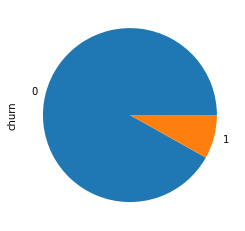

In [26]:
high_value_cust['churn'].value_counts(normalize=True).plot(kind='pie')
plt.show()

#### Dropping the month 9 columns after deriving the churn variable

In [27]:
mnth_9_cols = [col for col in high_value_cust.columns if '_9' in col]
high_value_cust.drop(mnth_9_cols, axis=1, inplace=True)

In [28]:
high_value_cust.shape

(30001, 148)

#### Dropping the fields that were created to filter high value customers and were used to create fields to find out high value customers

In [29]:
cols_to_drop = ['total_rech_amt_data_6', 'total_rech_amt_data_7', 'total_rech_amt_data_8', 'av_rech_amt_data_6', 'total_rech_data_6', 'av_rech_amt_data_7', 'total_rech_data_7', 'av_rech_amt_data_8', 'total_rech_data_8',]
high_value_cust.drop(cols_to_drop, axis=1, inplace=True)

In [30]:
high_value_cust.shape

(30001, 139)

In [31]:
(100*high_value_cust.isnull().sum() / high_value_cust.shape[0]).sort_values(ascending=False)

churn                  0.0
isd_og_mou_7           0.0
og_others_7            0.0
og_others_6            0.0
spl_og_mou_8           0.0
spl_og_mou_7           0.0
spl_og_mou_6           0.0
isd_og_mou_8           0.0
isd_og_mou_6           0.0
std_og_t2m_mou_7       0.0
std_og_mou_8           0.0
std_og_mou_7           0.0
std_og_mou_6           0.0
std_og_t2f_mou_8       0.0
std_og_t2f_mou_7       0.0
std_og_t2f_mou_6       0.0
og_others_8            0.0
total_og_mou_6         0.0
total_og_mou_7         0.0
total_og_mou_8         0.0
loc_ic_t2t_mou_6       0.0
loc_ic_t2t_mou_7       0.0
loc_ic_t2t_mou_8       0.0
loc_ic_t2m_mou_6       0.0
loc_ic_t2m_mou_7       0.0
loc_ic_t2m_mou_8       0.0
loc_ic_t2f_mou_6       0.0
loc_ic_t2f_mou_7       0.0
loc_ic_t2f_mou_8       0.0
loc_ic_mou_6           0.0
loc_ic_mou_7           0.0
loc_ic_mou_8           0.0
std_ic_t2t_mou_6       0.0
std_og_t2m_mou_8       0.0
std_og_t2m_mou_6       0.0
std_ic_t2t_mou_8       0.0
offnet_mou_8           0.0
r

## Deriving new variables

#### 1. Deriving the tenure of the customer and dropping the 'aon' feature

In [32]:
high_value_cust['tenure_mnth'] = (high_value_cust.aon/30).round(0)
high_value_cust.drop('aon', axis=1, inplace=True)

#### 2. avg_rech_amt_6_7 is the 2nd derived variable that was created earlier

#### 3. combined_rech_amt_8 is the 3rd derived variable that was created earlier

## EDA

#### tenure vs Churn

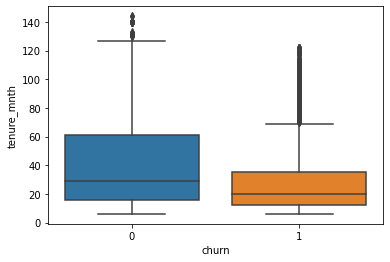

In [33]:
sns.boxplot(high_value_cust.churn, high_value_cust.tenure_mnth)
plt.show()

#### above plot shows that older customers are more likely to stay with the telecom provider

#### combined_rech_amt_8 vs churn

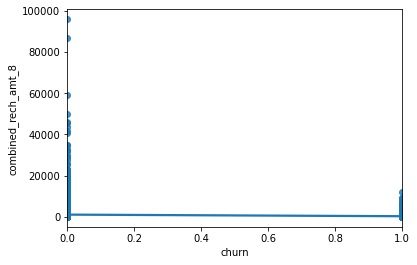

In [34]:
sns.regplot(high_value_cust.churn, high_value_cust.combined_rech_amt_8)
plt.show()

#### rechrage amount for non-churner is higher than the churners

#### arpu_8 vs churn

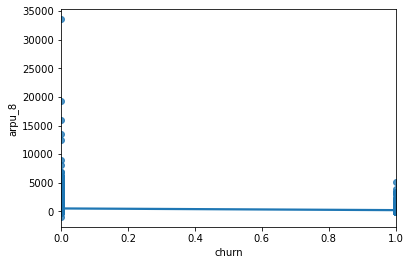

In [35]:
sns.regplot(high_value_cust.churn, high_value_cust.arpu_8)
plt.show()

#### average revenue for non-churners are more than those of churners

### Correlation map

Text(0.5, 1.0, 'Features Correlating with Churn variable')

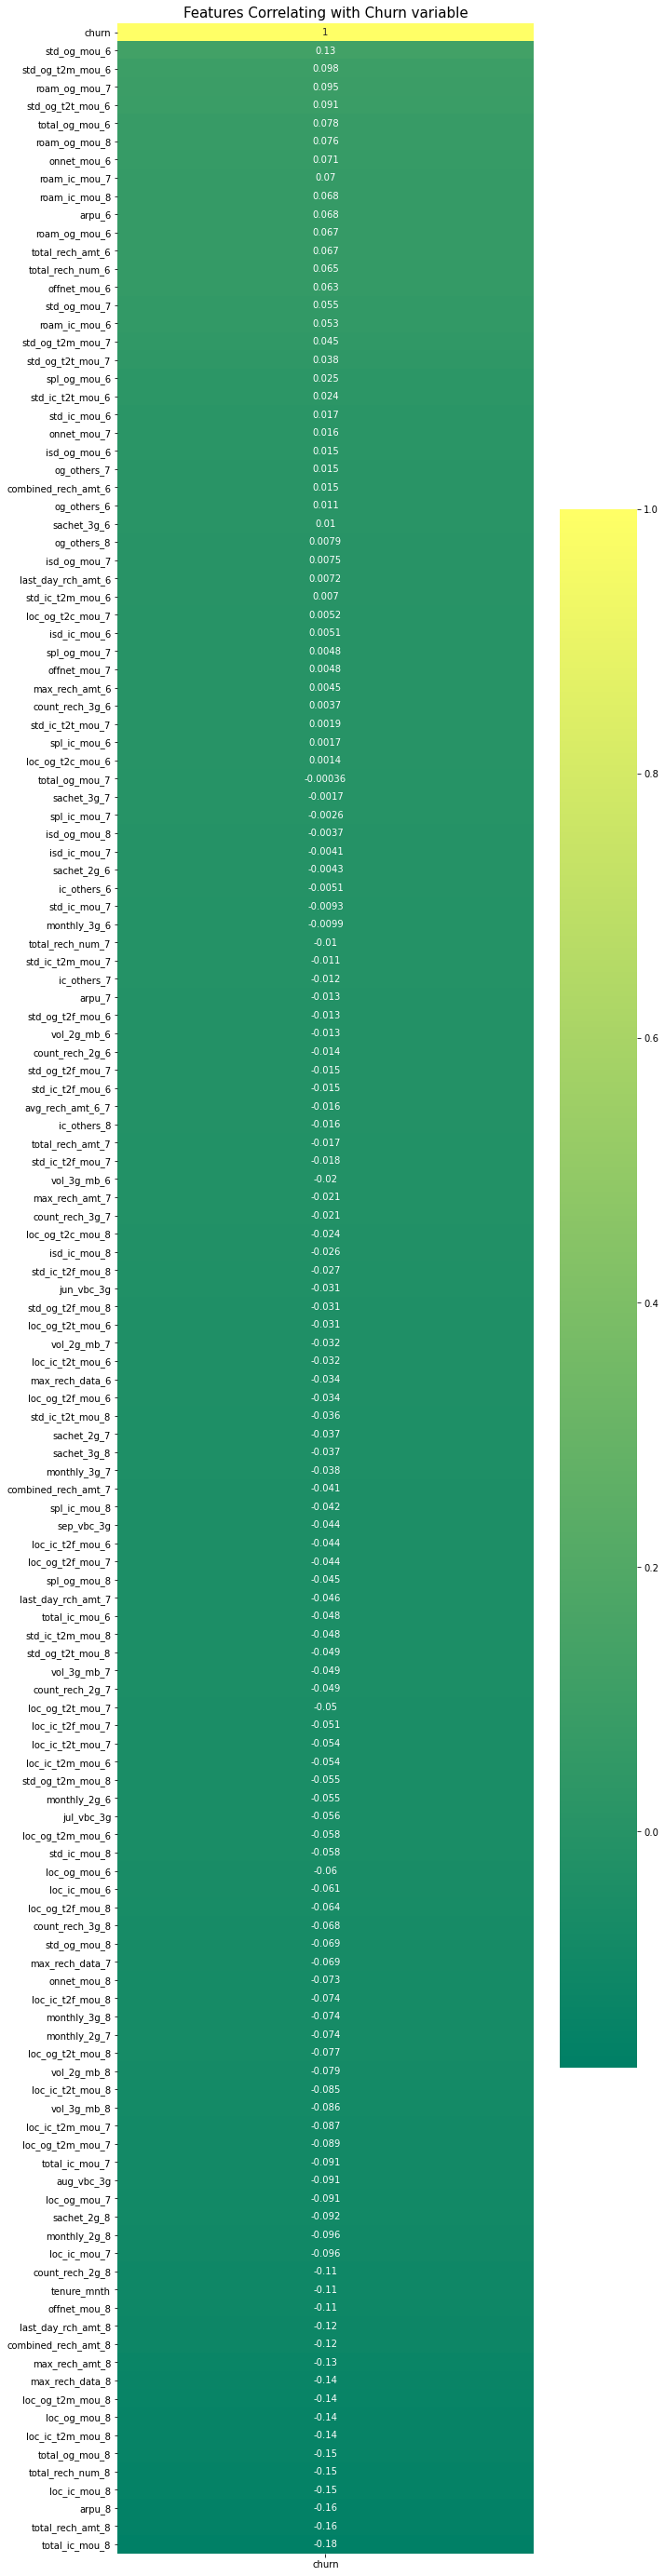

In [36]:
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(high_value_cust.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

#### Inference from above chart:
- positively correlated -- std_og_mou_6, std_og_t2m_mou_6, roam_og_mou_7
- negatively correlated -- total_ic_mou_8, total_rech_amt_8, arpu_8, loc_ic_mou_8

## Outlier treatment

In [37]:
def outlier_treat(array):
    q3 = array.quantile(.75)
    q1 = array.quantile(.25)
    iqr = q3 - q1
    outlier_low = q1 - (1.5 * iqr) 
    outlier_high = q1 + (1.5 * iqr)
    array[array<outlier_low] = outlier_low
    array[array>outlier_high] = outlier_high
    return array

In [38]:
num_cols = high_value_cust.drop('churn', axis=1).columns
high_value_cust[num_cols] = high_value_cust[num_cols].apply(outlier_treat, axis=0)

## Train-Test Split

In [39]:
high_value_cust_use = high_value_cust.copy()
X = high_value_cust_use.drop('churn', axis=1)
y = high_value_cust_use['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)
print("X_train size: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train size:  (21000, 138)
X_test:  (9001, 138)


## Scaling the numerical features

In [40]:
num_cols = high_value_cust_use.select_dtypes('float64').columns.tolist()

scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

## Data imbalance Handling

In [41]:
sm=SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print("X_train size: ", X_train_sm.shape)
print("y_train size: ", y_train_sm.shape)

X_train size:  (38576, 138)
y_train size:  (38576,)


## Logistic Regression Model

### Feature Selection using RFE

In [47]:
logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select=30)
rfe = rfe.fit(X_train_sm,y_train_sm)
rfe_columns=X_train_sm.columns[rfe.support_]

In [48]:
rfe_columns

Index(['arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7', 'std_og_t2t_mou_7',
       'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_7',
       'last_day_rch_amt_8', 'count_rech_2g_6', 'count_rech_2g_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'sachet_2g_8', 'combined_rech_amt_6',
       'combined_rech_amt_8', 'avg_rech_amt_6_7', 'tenure_mnth'],
      dtype='object')

#### Building 1st logistic regression model with selected features

In [49]:
X_train_SM = stm.add_constant(X_train_sm[rfe_columns])
logm1 = stm.GLM(y_train_sm,X_train_SM, family = stm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38545
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14040.
Date:                Tue, 02 Nov 2021   Deviance:                       28080.
Time:                        23:02:03   Pearson chi2:                 5.16e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.6953      0.088     19.304      0.000       1.523       1.867
arpu_7                  0.9861      0.208      4.748      0.000       0.579       1.393
onnet_mou_6             0.4677      0.087      5.365      0.000       0.297       0.639
onnet_mou_7             0.7168      0.120      5.970      0.000       0.481       0.952
offnet_mou_7            0.5566      0.074      7.474      0.000       0.411       0.703
loc_og_t2t_mou_8       -0.5389      0.091     -5.907      0.000      -0.718      -0.360
loc_og_t2m_mou_7       -0.5900      0.086     -6.867      0.000      -0.758      -0.422
std_og_t2t_mou_7       -0.7031      0.091     -7.760      0.000      -0.881      -0.526
std_og_mou_8            0.7957      0.113      7.021      0.000       0.574       1.018
total_og_mou_8         -2.7818      0.140    -19.926      0.000      -3.055      -2.508
loc_ic_t2t_mou_8       -0.6683      0.121     -5.530      0.000      -0.905      -0.431
loc_ic_t2m_mou_8       -1.1754      0.213     -5.512      0.000      -1.593      -0.757
loc_ic_mou_8            1.5349      0.299      5.125      0.000       0.948       2.122
total_ic_mou_6          0.7022      0.091      7.681      0.000       0.523       0.881
total_ic_mou_7          0.9234      0.117      7.879      0.000       0.694       1.153
total_ic_mou_8         -3.7731      0.153    -24.644      0.000      -4.073      -3.473
total_rech_num_8       -2.3279      0.091    -25.718      0.000      -2.505      -2.151
total_rech_amt_6       -0.6705      0.112     -5.979      0.000      -0.890      -0.451
total_rech_amt_7        0.7279      0.159      4.573      0.000       0.416       1.040
total_rech_amt_8        2.0433      0.152     13.406      0.000       1.745       2.342
max_rech_amt_7         -0.6891      0.075     -9.148      0.000      -0.837      -0.541
last_day_rch_amt_8     -1.9566      0.062    -31.495      0.000      -2.078      -1.835
count_rech_2g_6        -0.4789      0.053     -8.997      0.000      -0.583      -0.375
count_rech_2g_8        -1.1407      0.134     -8.496      0.000      -1.404      -0.878
vol_2g_mb_8            -1.1472      0.063    -18.267      0.000      -1.270      -1.024
vol_3g_mb_8            -1.2184      0.064    -19.052      0.000      -1.344      -1.093
sachet_2g_8             1.0384      0.133      7.810      0.000       0.778       1.299
combined_rech_amt_6     0.8820      0.127      6.950      0.000       0.633       1.131
combined_rech_amt_8    -1.0132      0.137     -7.388      0.000      -1.282      -0.744
avg_rech_amt_6_7        0.6438      0.090      7.187      0.000       0.468       0.819
tenure_mnth            -0.7661      0.056    -13.770      0.000      -0.875      -0.657
=======================================================================================
"""

In [50]:
# Getting the predicted values on the train set
y_train_pred = res1.predict(X_train_SM)
y_train_pred = y_train_pred.values.reshape(-1)

# Creating a dataframe with the actual churn flag and predicted probabilities
y_train_pred_final = pd.DataFrame({'Churn':y_train_sm.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train_sm.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.022860,0
1,0,0.324331,1
2,0,0.284563,2
3,0,0.355574,3
4,0,0.528493,4


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [51]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.022860,0,0
1,0,0.324331,1,0
2,0,0.284563,2,0
3,0,0.355574,3,0
4,0,0.528493,4,1


In [52]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[16293  2995]
 [ 2919 16369]]


In [53]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8466922438822065


#### Checking VIF

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_7,56.36
11,loc_ic_mou_8,51.01
17,total_rech_amt_7,37.96
10,loc_ic_t2m_mou_8,26.36
26,combined_rech_amt_6,26.02
16,total_rech_amt_6,23.52
18,total_rech_amt_8,22.46
27,combined_rech_amt_8,18.13
2,onnet_mou_7,15.14
8,total_og_mou_8,14.43


#### lets drop arpu_7 as it has very high VIF and rebuild the model

In [55]:
col = rfe_columns.drop('arpu_7', 1)

# Let's re-run the model using the selected variables
X_train_SM = stm.add_constant(X_train_sm[col])
logm2 = stm.GLM(y_train_sm,X_train_SM, family = stm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38546
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14051.
Date:                Tue, 02 Nov 2021   Deviance:                       28102.
Time:                        23:02:41   Pearson chi2:                 5.14e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.9598      0.068     28.728      0.000       1.826       2.094
onnet_mou_6             0.4112      0.086      4.758      0.000       0.242       0.581
onnet_mou_7             0.8054      0.119      6.786      0.000       0.573       1.038
offnet_mou_7            0.6040      0.074      8.187      0.000       0.459       0.749
loc_og_t2t_mou_8       -0.5642      0.091     -6.199      0.000      -0.743      -0.386
loc_og_t2m_mou_7       -0.5846      0.086     -6.810      0.000      -0.753      -0.416
std_og_t2t_mou_7       -0.7039      0.091     -7.771      0.000      -0.881      -0.526
std_og_mou_8            0.7834      0.113      6.925      0.000       0.562       1.005
total_og_mou_8         -2.8136      0.139    -20.187      0.000      -3.087      -2.540
loc_ic_t2t_mou_8       -0.6667      0.121     -5.518      0.000      -0.903      -0.430
loc_ic_t2m_mou_8       -1.1923      0.213     -5.594      0.000      -1.610      -0.775
loc_ic_mou_8            1.5490      0.299      5.174      0.000       0.962       2.136
total_ic_mou_6          0.6787      0.091      7.432      0.000       0.500       0.858
total_ic_mou_7          0.9832      0.117      8.440      0.000       0.755       1.212
total_ic_mou_8         -3.8001      0.153    -24.853      0.000      -4.100      -3.500
total_rech_num_8       -2.3150      0.090    -25.588      0.000      -2.492      -2.138
total_rech_amt_6       -0.5690      0.110     -5.161      0.000      -0.785      -0.353
total_rech_amt_7        1.2433      0.117     10.665      0.000       1.015       1.472
total_rech_amt_8        2.1604      0.150     14.357      0.000       1.865       2.455
max_rech_amt_7         -0.6963      0.075     -9.258      0.000      -0.844      -0.549
last_day_rch_amt_8     -1.9600      0.062    -31.554      0.000      -2.082      -1.838
count_rech_2g_6        -0.4848      0.053     -9.109      0.000      -0.589      -0.381
count_rech_2g_8        -1.1365      0.134     -8.470      0.000      -1.400      -0.874
vol_2g_mb_8            -1.1453      0.063    -18.241      0.000      -1.268      -1.022
vol_3g_mb_8            -1.2189      0.064    -19.056      0.000      -1.344      -1.094
sachet_2g_8             1.0256      0.133      7.718      0.000       0.765       1.286
combined_rech_amt_6     0.8331      0.127      6.583      0.000       0.585       1.081
combined_rech_amt_8    -1.0353      0.137     -7.552      0.000      -1.304      -0.767
avg_rech_amt_6_7        0.6973      0.089      7.832      0.000       0.523       0.872
tenure_mnth            -0.7623      0.056    -13.708      0.000      -0.871      -0.653
=======================================================================================
"""

In [56]:
# Getting the predicted values on the train set
y_train_pred = res2.predict(X_train_SM).values.reshape(-1)

y_train_pred_final['Churn_Prob'] = y_train_pred

y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.023313,0,0
1,0,0.319538,1,0
2,0,0.274927,2,0
3,0,0.359231,3,0
4,0,0.544870,4,1


In [57]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8465367067606803


#### Checking the VIF again

In [58]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,loc_ic_mou_8,50.97
9,loc_ic_t2m_mou_8,26.36
25,combined_rech_amt_6,24.53
15,total_rech_amt_6,22.93
17,total_rech_amt_8,22.46
16,total_rech_amt_7,19.38
26,combined_rech_amt_8,18.13
1,onnet_mou_7,14.93
7,total_og_mou_8,14.30
13,total_ic_mou_8,13.58


#### lets drop loc_ic_mou_8 as it has very high VIF and rebuild the model

In [59]:
col = col.drop('loc_ic_mou_8', 1)

# Let's re-run the model using the selected variables
X_train_SM = stm.add_constant(X_train_sm[col])
logm3 = stm.GLM(y_train_sm,X_train_SM, family = stm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38547
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14064.
Date:                Tue, 02 Nov 2021   Deviance:                       28128.
Time:                        23:02:53   Pearson chi2:                 5.18e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.9690      0.068     28.869      0.000       1.835       2.103
onnet_mou_6             0.4034      0.086      4.668      0.000       0.234       0.573
onnet_mou_7             0.8391      0.119      7.067      0.000       0.606       1.072
offnet_mou_7            0.5983      0.074      8.121      0.000       0.454       0.743
loc_og_t2t_mou_8       -0.5781      0.091     -6.352      0.000      -0.756      -0.400
loc_og_t2m_mou_7       -0.5987      0.086     -6.979      0.000      -0.767      -0.431
std_og_t2t_mou_7       -0.7308      0.091     -8.063      0.000      -0.908      -0.553
std_og_mou_8            0.7323      0.113      6.508      0.000       0.512       0.953
total_og_mou_8         -2.7798      0.139    -19.983      0.000      -3.052      -2.507
loc_ic_t2t_mou_8       -0.2522      0.091     -2.779      0.005      -0.430      -0.074
loc_ic_t2m_mou_8       -0.2488      0.115     -2.164      0.031      -0.474      -0.023
total_ic_mou_6          0.6818      0.091      7.473      0.000       0.503       0.861
total_ic_mou_7          1.0057      0.116      8.653      0.000       0.778       1.233
total_ic_mou_8         -3.5412      0.141    -25.040      0.000      -3.818      -3.264
total_rech_num_8       -2.3356      0.090    -25.858      0.000      -2.513      -2.159
total_rech_amt_6       -0.5659      0.110     -5.133      0.000      -0.782      -0.350
total_rech_amt_7        1.2335      0.116     10.592      0.000       1.005       1.462
total_rech_amt_8        2.1442      0.150     14.261      0.000       1.850       2.439
max_rech_amt_7         -0.6987      0.075     -9.294      0.000      -0.846      -0.551
last_day_rch_amt_8     -1.9621      0.062    -31.610      0.000      -2.084      -1.840
count_rech_2g_6        -0.4876      0.053     -9.166      0.000      -0.592      -0.383
count_rech_2g_8        -1.1335      0.134     -8.449      0.000      -1.396      -0.871
vol_2g_mb_8            -1.1473      0.063    -18.278      0.000      -1.270      -1.024
vol_3g_mb_8            -1.2132      0.064    -18.974      0.000      -1.339      -1.088
sachet_2g_8             1.0184      0.133      7.663      0.000       0.758       1.279
combined_rech_amt_6     0.8342      0.127      6.592      0.000       0.586       1.082
combined_rech_amt_8    -1.0234      0.137     -7.468      0.000      -1.292      -0.755
avg_rech_amt_6_7        0.6940      0.089      7.793      0.000       0.519       0.869
tenure_mnth            -0.7605      0.056    -13.685      0.000      -0.869      -0.652
=======================================================================================
"""

In [60]:
# Getting the predicted values on the train set
y_train_pred = res3.predict(X_train_SM).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.025118,0,0
1,0,0.326685,1,0
2,0,0.266476,2,0
3,0,0.361849,3,0
4,0,0.558027,4,1


In [61]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8461219411032767


#### Checking the VIF again

In [62]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,combined_rech_amt_6,24.52
14,total_rech_amt_6,22.93
16,total_rech_amt_8,22.43
15,total_rech_amt_7,19.37
25,combined_rech_amt_8,18.12
1,onnet_mou_7,14.89
7,total_og_mou_8,14.29
12,total_ic_mou_8,11.74
11,total_ic_mou_7,11.70
20,count_rech_2g_8,9.34


#### lets drop combined_rech_amt_6 as it has very high VIF and rebuild the model

In [63]:
col = col.drop('combined_rech_amt_6', 1)
# Let's re-run the model using the selected variables
X_train_SM = stm.add_constant(X_train_sm[col])
logm4 = stm.GLM(y_train_sm,X_train_SM, family = stm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38548
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14086.
Date:                Tue, 02 Nov 2021   Deviance:                       28172.
Time:                        23:03:12   Pearson chi2:                 5.19e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.1615      0.062     34.953      0.000       2.040       2.283
onnet_mou_6             0.3412      0.086      3.966      0.000       0.173       0.510
onnet_mou_7             0.9006      0.118      7.610      0.000       0.669       1.133
offnet_mou_7            0.5938      0.074      8.068      0.000       0.450       0.738
loc_og_t2t_mou_8       -0.5894      0.091     -6.479      0.000      -0.768      -0.411
loc_og_t2m_mou_7       -0.6075      0.086     -7.084      0.000      -0.776      -0.439
std_og_t2t_mou_7       -0.7448      0.091     -8.218      0.000      -0.922      -0.567
std_og_mou_8            0.7318      0.112      6.509      0.000       0.511       0.952
total_og_mou_8         -2.7672      0.139    -19.906      0.000      -3.040      -2.495
loc_ic_t2t_mou_8       -0.2482      0.091     -2.737      0.006      -0.426      -0.070
loc_ic_t2m_mou_8       -0.2358      0.115     -2.049      0.040      -0.461      -0.010
total_ic_mou_6          0.6896      0.091      7.565      0.000       0.511       0.868
total_ic_mou_7          0.9860      0.116      8.491      0.000       0.758       1.214
total_ic_mou_8         -3.5395      0.142    -24.985      0.000      -3.817      -3.262
total_rech_num_8       -2.3642      0.090    -26.240      0.000      -2.541      -2.188
total_rech_amt_6       -0.0731      0.081     -0.902      0.367      -0.232       0.086
total_rech_amt_7        0.9469      0.108      8.787      0.000       0.736       1.158
total_rech_amt_8        2.1396      0.150     14.255      0.000       1.845       2.434
max_rech_amt_7         -0.7298      0.075     -9.753      0.000      -0.876      -0.583
last_day_rch_amt_8     -1.9616      0.062    -31.646      0.000      -2.083      -1.840
count_rech_2g_6        -0.3716      0.050     -7.418      0.000      -0.470      -0.273
count_rech_2g_8        -1.2196      0.133     -9.136      0.000      -1.481      -0.958
vol_2g_mb_8            -1.1347      0.063    -18.132      0.000      -1.257      -1.012
vol_3g_mb_8            -1.1834      0.063    -18.638      0.000      -1.308      -1.059
sachet_2g_8             1.0441      0.133      7.859      0.000       0.784       1.304
combined_rech_amt_8    -0.9881      0.136     -7.245      0.000      -1.255      -0.721
avg_rech_amt_6_7        1.0768      0.068     15.872      0.000       0.944       1.210
tenure_mnth            -0.7602      0.056    -13.693      0.000      -0.869      -0.651
=======================================================================================
"""

In [64]:
# Getting the predicted values on the train set
y_train_pred = res4.predict(X_train_SM).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.027672,0,0
1,0,0.322071,1,0
2,0,0.223321,2,0
3,0,0.363335,3,0
4,0,0.558351,4,1


In [65]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8461997096640398


#### Checking the VIF

In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,total_rech_amt_8,22.23
24,combined_rech_amt_8,18.08
15,total_rech_amt_7,17.58
1,onnet_mou_7,14.82
7,total_og_mou_8,14.29
12,total_ic_mou_8,11.72
11,total_ic_mou_7,11.70
14,total_rech_amt_6,9.35
20,count_rech_2g_8,9.21
0,onnet_mou_6,9.13


#### lets drop total_rech_amt_8 as it has very high VIF and rebuild the model

In [67]:
col = col.drop('total_rech_amt_8', 1)
# Let's re-run the model using the selected variables
X_train_SM = stm.add_constant(X_train_sm[col])
logm5 = stm.GLM(y_train_sm,X_train_SM, family = stm.families.Binomial())
res5 = logm5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38549
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14192.
Date:                Tue, 02 Nov 2021   Deviance:                       28385.
Time:                        23:03:24   Pearson chi2:                 5.01e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.9887      0.060     33.099      0.000       1.871       2.106
onnet_mou_6             0.2631      0.086      3.063      0.002       0.095       0.431
onnet_mou_7             0.8904      0.118      7.570      0.000       0.660       1.121
offnet_mou_7            0.5180      0.073      7.055      0.000       0.374       0.662
loc_og_t2t_mou_8       -0.5450      0.091     -6.012      0.000      -0.723      -0.367
loc_og_t2m_mou_7       -0.6105      0.086     -7.128      0.000      -0.778      -0.443
std_og_t2t_mou_7       -0.7528      0.090     -8.346      0.000      -0.930      -0.576
std_og_mou_8            0.7004      0.112      6.251      0.000       0.481       0.920
total_og_mou_8         -2.2593      0.133    -17.000      0.000      -2.520      -1.999
loc_ic_t2t_mou_8       -0.2753      0.090     -3.051      0.002      -0.452      -0.098
loc_ic_t2m_mou_8       -0.2931      0.114     -2.563      0.010      -0.517      -0.069
total_ic_mou_6          0.6359      0.091      7.013      0.000       0.458       0.814
total_ic_mou_7          0.9330      0.115      8.081      0.000       0.707       1.159
total_ic_mou_8         -3.3267      0.140    -23.741      0.000      -3.601      -3.052
total_rech_num_8       -2.1046      0.088    -24.022      0.000      -2.276      -1.933
total_rech_amt_6        0.2184      0.078      2.791      0.005       0.065       0.372
total_rech_amt_7        1.2801      0.106     12.130      0.000       1.073       1.487
max_rech_amt_7         -0.6843      0.075     -9.159      0.000      -0.831      -0.538
last_day_rch_amt_8     -1.6987      0.059    -28.983      0.000      -1.814      -1.584
count_rech_2g_6        -0.3273      0.050     -6.568      0.000      -0.425      -0.230
count_rech_2g_8        -1.1512      0.132     -8.736      0.000      -1.410      -0.893
vol_2g_mb_8            -1.1767      0.062    -18.989      0.000      -1.298      -1.055
vol_3g_mb_8            -1.3321      0.062    -21.584      0.000      -1.453      -1.211
sachet_2g_8             0.7044      0.129      5.450      0.000       0.451       0.958
combined_rech_amt_8     0.3646      0.093      3.934      0.000       0.183       0.546
avg_rech_amt_6_7        0.8995      0.066     13.712      0.000       0.771       1.028
tenure_mnth            -0.7171      0.055    -13.005      0.000      -0.825      -0.609
=======================================================================================
"""

In [68]:
# Getting the predicted values on the train set
y_train_pred = res5.predict(X_train_SM).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8444369556200747


#### Checking the VIF

In [69]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,total_rech_amt_7,16.90
1,onnet_mou_7,14.82
7,total_og_mou_8,13.07
11,total_ic_mou_7,11.68
12,total_ic_mou_8,11.56
23,combined_rech_amt_8,9.36
19,count_rech_2g_8,9.21
0,onnet_mou_6,9.09
14,total_rech_amt_6,9.09
5,std_og_t2t_mou_7,8.65


#### lets drop total_rech_amt_7 as it has very high VIF and rebuild the model

In [70]:
col = col.drop('total_rech_amt_7', 1)
# Let's re-run the model using the selected variables
X_train_SM = stm.add_constant(X_train_sm[col])
logm6 = stm.GLM(y_train_sm,X_train_SM, family = stm.families.Binomial())
res6 = logm6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38550
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14267.
Date:                Tue, 02 Nov 2021   Deviance:                       28534.
Time:                        23:03:34   Pearson chi2:                 5.03e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.0333      0.060     33.836      0.000       1.916       2.151
onnet_mou_6             0.1889      0.085      2.211      0.027       0.021       0.356
onnet_mou_7             1.2255      0.114     10.783      0.000       1.003       1.448
offnet_mou_7            0.8564      0.068     12.644      0.000       0.724       0.989
loc_og_t2t_mou_8       -0.6145      0.090     -6.808      0.000      -0.791      -0.438
loc_og_t2m_mou_7       -0.5792      0.085     -6.808      0.000      -0.746      -0.412
std_og_t2t_mou_7       -0.7990      0.090     -8.925      0.000      -0.974      -0.624
std_og_mou_8            0.6435      0.111      5.802      0.000       0.426       0.861
total_og_mou_8         -2.1510      0.131    -16.378      0.000      -2.408      -1.894
loc_ic_t2t_mou_8       -0.2672      0.090     -2.971      0.003      -0.443      -0.091
loc_ic_t2m_mou_8       -0.3030      0.114     -2.654      0.008      -0.527      -0.079
total_ic_mou_6          0.5503      0.090      6.110      0.000       0.374       0.727
total_ic_mou_7          1.1182      0.114      9.777      0.000       0.894       1.342
total_ic_mou_8         -3.4550      0.139    -24.768      0.000      -3.728      -3.182
total_rech_num_8       -1.8163      0.084    -21.684      0.000      -1.980      -1.652
total_rech_amt_6        0.1502      0.078      1.928      0.054      -0.002       0.303
max_rech_amt_7         -0.1948      0.063     -3.095      0.002      -0.318      -0.071
last_day_rch_amt_8     -1.6675      0.058    -28.705      0.000      -1.781      -1.554
count_rech_2g_6        -0.4621      0.049     -9.490      0.000      -0.558      -0.367
count_rech_2g_8        -1.1342      0.132     -8.571      0.000      -1.394      -0.875
vol_2g_mb_8            -1.2320      0.062    -19.890      0.000      -1.353      -1.111
vol_3g_mb_8            -1.4467      0.061    -23.672      0.000      -1.567      -1.327
sachet_2g_8             0.6347      0.130      4.892      0.000       0.380       0.889
combined_rech_amt_8     0.3626      0.092      3.941      0.000       0.182       0.543
avg_rech_amt_6_7        1.2373      0.060     20.669      0.000       1.120       1.355
tenure_mnth            -0.6957      0.055    -12.663      0.000      -0.803      -0.588
=======================================================================================
"""

In [71]:
# Getting the predicted values on the train set
y_train_pred = res6.predict(X_train_SM).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8435815014516798


#### Checking the VIF

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,onnet_mou_7,13.80
7,total_og_mou_8,13.07
11,total_ic_mou_7,11.47
12,total_ic_mou_8,11.46
22,combined_rech_amt_8,9.36
18,count_rech_2g_8,9.20
14,total_rech_amt_6,9.07
0,onnet_mou_6,9.03
5,std_og_t2t_mou_7,8.64
6,std_og_mou_8,8.54


#### lets drop onnet_mou_7 as it has very high VIF and rebuild the model

In [73]:
col = col.drop('onnet_mou_7', 1)
# Let's re-run the model using the selected variables
X_train_SM = stm.add_constant(X_train_sm[col])
logm7 = stm.GLM(y_train_sm,X_train_SM, family = stm.families.Binomial())
res7 = logm7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38551
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14326.
Date:                Tue, 02 Nov 2021   Deviance:                       28651.
Time:                        23:03:43   Pearson chi2:                 5.08e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.0643      0.060     34.397      0.000       1.947       2.182
onnet_mou_6             0.7054      0.072      9.853      0.000       0.565       0.846
offnet_mou_7            0.8285      0.067     12.282      0.000       0.696       0.961
loc_og_t2t_mou_8       -0.4322      0.088     -4.919      0.000      -0.604      -0.260
loc_og_t2m_mou_7       -0.5792      0.085     -6.829      0.000      -0.745      -0.413
std_og_t2t_mou_7       -0.1819      0.068     -2.674      0.007      -0.315      -0.049
std_og_mou_8            0.4641      0.110      4.235      0.000       0.249       0.679
total_og_mou_8         -1.9279      0.129    -14.893      0.000      -2.182      -1.674
loc_ic_t2t_mou_8       -0.2425      0.090     -2.710      0.007      -0.418      -0.067
loc_ic_t2m_mou_8       -0.3321      0.114     -2.918      0.004      -0.555      -0.109
total_ic_mou_6          0.4337      0.089      4.875      0.000       0.259       0.608
total_ic_mou_7          1.3026      0.113     11.535      0.000       1.081       1.524
total_ic_mou_8         -3.5473      0.139    -25.544      0.000      -3.820      -3.275
total_rech_num_8       -1.7810      0.083    -21.351      0.000      -1.945      -1.618
total_rech_amt_6        0.0065      0.076      0.084      0.933      -0.143       0.156
max_rech_amt_7         -0.1577      0.063     -2.509      0.012      -0.281      -0.035
last_day_rch_amt_8     -1.6189      0.058    -28.115      0.000      -1.732      -1.506
count_rech_2g_6        -0.4983      0.049    -10.263      0.000      -0.594      -0.403
count_rech_2g_8        -1.1426      0.132     -8.657      0.000      -1.401      -0.884
vol_2g_mb_8            -1.2496      0.062    -20.224      0.000      -1.371      -1.129
vol_3g_mb_8            -1.4800      0.061    -24.306      0.000      -1.599      -1.361
sachet_2g_8             0.6182      0.129      4.775      0.000       0.364       0.872
combined_rech_amt_8     0.3727      0.092      4.068      0.000       0.193       0.552
avg_rech_amt_6_7        1.2900      0.060     21.629      0.000       1.173       1.407
tenure_mnth            -0.6832      0.055    -12.491      0.000      -0.790      -0.576
=======================================================================================
"""

In [74]:
# Getting the predicted values on the train set
y_train_pred = res7.predict(X_train_SM).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8416372874326006


#### Checking the VIF

In [75]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_og_mou_8,12.63
11,total_ic_mou_8,11.37
10,total_ic_mou_7,11.08
21,combined_rech_amt_8,9.36
17,count_rech_2g_8,9.20
13,total_rech_amt_6,8.86
8,loc_ic_t2m_mou_8,8.48
5,std_og_mou_8,8.23
9,total_ic_mou_6,7.89
20,sachet_2g_8,7.04


#### lets drop total_og_mou_8 as it has very high VIF and rebuild the model

In [76]:
col = col.drop('total_og_mou_8', 1)
# Let's re-run the model using the selected variables
X_train_SM = stm.add_constant(X_train_sm[col])
logm8 = stm.GLM(y_train_sm,X_train_SM, family = stm.families.Binomial())
res8 = logm8.fit()
res8.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38552
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14443.
Date:                Tue, 02 Nov 2021   Deviance:                       28886.
Time:                        23:03:55   Pearson chi2:                 5.04e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.1333      0.060     35.720      0.000       2.016       2.250
onnet_mou_6             0.5431      0.070      7.805      0.000       0.407       0.679
offnet_mou_7            0.7669      0.066     11.565      0.000       0.637       0.897
loc_og_t2t_mou_8       -0.7928      0.084     -9.423      0.000      -0.958      -0.628
loc_og_t2m_mou_7       -0.8223      0.082     -9.981      0.000      -0.984      -0.661
std_og_t2t_mou_7       -0.0518      0.067     -0.774      0.439      -0.183       0.079
std_og_mou_8           -0.7951      0.067    -11.787      0.000      -0.927      -0.663
loc_ic_t2t_mou_8       -0.1649      0.089     -1.854      0.064      -0.339       0.009
loc_ic_t2m_mou_8       -0.4436      0.113     -3.920      0.000      -0.665      -0.222
total_ic_mou_6          0.5165      0.089      5.817      0.000       0.342       0.690
total_ic_mou_7          1.4826      0.112     13.228      0.000       1.263       1.702
total_ic_mou_8         -3.8650      0.137    -28.171      0.000      -4.134      -3.596
total_rech_num_8       -1.8757      0.083    -22.648      0.000      -2.038      -1.713
total_rech_amt_6        0.0607      0.076      0.798      0.425      -0.088       0.210
max_rech_amt_7         -0.1622      0.063     -2.587      0.010      -0.285      -0.039
last_day_rch_amt_8     -1.6386      0.057    -28.641      0.000      -1.751      -1.527
count_rech_2g_6        -0.5179      0.048    -10.689      0.000      -0.613      -0.423
count_rech_2g_8        -1.1460      0.132     -8.682      0.000      -1.405      -0.887
vol_2g_mb_8            -1.2084      0.062    -19.586      0.000      -1.329      -1.087
vol_3g_mb_8            -1.3691      0.060    -22.758      0.000      -1.487      -1.251
sachet_2g_8             0.7297      0.129      5.648      0.000       0.476       0.983
combined_rech_amt_8     0.1189      0.090      1.322      0.186      -0.057       0.295
avg_rech_amt_6_7        1.2590      0.060     21.151      0.000       1.142       1.376
tenure_mnth            -0.6804      0.054    -12.521      0.000      -0.787      -0.574
=======================================================================================
"""

In [77]:
# Getting the predicted values on the train set
y_train_pred = res8.predict(X_train_SM).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8392523849025301


#### Checking the VIF

In [78]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,total_ic_mou_7,10.92
10,total_ic_mou_8,10.82
16,count_rech_2g_8,9.20
20,combined_rech_amt_8,9.01
12,total_rech_amt_6,8.75
7,loc_ic_t2m_mou_8,8.47
8,total_ic_mou_6,7.87
19,sachet_2g_8,7.00
11,total_rech_num_8,6.56
0,onnet_mou_6,6.20


#### lets drop total_ic_mou_7 as it has very high VIF and rebuild the model

In [79]:
col = col.drop('total_ic_mou_7', 1)
# Let's re-run the model using the selected variables
X_train_SM = stm.add_constant(X_train_sm[col])
logm9 = stm.GLM(y_train_sm,X_train_SM, family = stm.families.Binomial())
res9 = logm9.fit()
res9.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38553
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14533.
Date:                Tue, 02 Nov 2021   Deviance:                       29065.
Time:                        23:04:11   Pearson chi2:                 4.91e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.1672      0.060     36.320      0.000       2.050       2.284
onnet_mou_6             0.4937      0.069      7.124      0.000       0.358       0.630
offnet_mou_7            0.8927      0.065     13.673      0.000       0.765       1.021
loc_og_t2t_mou_8       -0.8921      0.083    -10.695      0.000      -1.056      -0.729
loc_og_t2m_mou_7       -0.5615      0.079     -7.076      0.000      -0.717      -0.406
std_og_t2t_mou_7        0.1065      0.065      1.628      0.104      -0.022       0.235
std_og_mou_8           -0.8806      0.067    -13.170      0.000      -1.012      -0.750
loc_ic_t2t_mou_8       -0.0237      0.087     -0.272      0.785      -0.195       0.147
loc_ic_t2m_mou_8       -0.5210      0.112     -4.670      0.000      -0.740      -0.302
total_ic_mou_6          1.1632      0.075     15.417      0.000       1.015       1.311
total_ic_mou_8         -3.1979      0.123    -25.911      0.000      -3.440      -2.956
total_rech_num_8       -1.8423      0.082    -22.363      0.000      -2.004      -1.681
total_rech_amt_6       -0.0946      0.075     -1.259      0.208      -0.242       0.053
max_rech_amt_7         -0.1210      0.063     -1.930      0.054      -0.244       0.002
last_day_rch_amt_8     -1.6562      0.057    -29.113      0.000      -1.768      -1.545
count_rech_2g_6        -0.5367      0.048    -11.096      0.000      -0.632      -0.442
count_rech_2g_8        -1.1171      0.132     -8.485      0.000      -1.375      -0.859
vol_2g_mb_8            -1.2086      0.062    -19.620      0.000      -1.329      -1.088
vol_3g_mb_8            -1.3720      0.060    -22.847      0.000      -1.490      -1.254
sachet_2g_8             0.7028      0.129      5.452      0.000       0.450       0.955
combined_rech_amt_8     0.0433      0.089      0.484      0.628      -0.132       0.218
avg_rech_amt_6_7        1.3305      0.059     22.455      0.000       1.214       1.447
tenure_mnth            -0.6844      0.054    -12.664      0.000      -0.790      -0.578
=======================================================================================
"""

In [80]:
# Getting the predicted values on the train set
y_train_pred = res9.predict(X_train_SM).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8379821650767316


#### Checking the VIF

In [81]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,total_ic_mou_8,9.42
15,count_rech_2g_8,9.20
19,combined_rech_amt_8,8.97
11,total_rech_amt_6,8.52
7,loc_ic_t2m_mou_8,8.45
18,sachet_2g_8,6.99
10,total_rech_num_8,6.55
0,onnet_mou_6,6.18
3,loc_og_t2m_mou_7,5.69
6,loc_ic_t2t_mou_8,5.56


#### lets drop total_ic_mou_8 as it has very high VIF and rebuild the model

In [82]:
col = col.drop('total_ic_mou_8', 1)
# Let's re-run the model using the selected variables
X_train_SM = stm.add_constant(X_train_sm[col])
logm10 = stm.GLM(y_train_sm,X_train_SM, family = stm.families.Binomial())
res10 = logm10.fit()
res10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38554
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14942.
Date:                Tue, 02 Nov 2021   Deviance:                       29885.
Time:                        23:04:19   Pearson chi2:                 4.78e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.3984      0.059     40.853      0.000       2.283       2.513
onnet_mou_6             0.5580      0.068      8.259      0.000       0.426       0.690
offnet_mou_7            0.8034      0.064     12.502      0.000       0.677       0.929
loc_og_t2t_mou_8       -0.9766      0.081    -12.071      0.000      -1.135      -0.818
loc_og_t2m_mou_7       -0.3742      0.077     -4.850      0.000      -0.525      -0.223
std_og_t2t_mou_7        0.0233      0.064      0.364      0.716      -0.102       0.149
std_og_mou_8           -1.0194      0.066    -15.556      0.000      -1.148      -0.891
loc_ic_t2t_mou_8       -0.6379      0.080     -7.971      0.000      -0.795      -0.481
loc_ic_t2m_mou_8       -2.1992      0.085    -25.994      0.000      -2.365      -2.033
total_ic_mou_6          0.5227      0.067      7.775      0.000       0.391       0.654
total_rech_num_8       -2.0759      0.080    -25.808      0.000      -2.234      -1.918
total_rech_amt_6        0.1477      0.074      1.994      0.046       0.003       0.293
max_rech_amt_7         -0.3258      0.061     -5.329      0.000      -0.446      -0.206
last_day_rch_amt_8     -1.7960      0.056    -32.182      0.000      -1.905      -1.687
count_rech_2g_6        -0.5305      0.047    -11.190      0.000      -0.623      -0.438
count_rech_2g_8        -1.1651      0.130     -8.933      0.000      -1.421      -0.909
vol_2g_mb_8            -1.2271      0.061    -20.110      0.000      -1.347      -1.108
vol_3g_mb_8            -1.3236      0.059    -22.360      0.000      -1.440      -1.208
sachet_2g_8             0.7667      0.128      6.004      0.000       0.516       1.017
combined_rech_amt_8    -0.2055      0.088     -2.340      0.019      -0.378      -0.033
avg_rech_amt_6_7        1.3369      0.058     22.873      0.000       1.222       1.451
tenure_mnth            -0.6421      0.052    -12.242      0.000      -0.745      -0.539
=======================================================================================
"""

In [83]:
# Getting the predicted values on the train set
y_train_pred = res10.predict(X_train_SM).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.832901285773538


In [84]:
#### Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,count_rech_2g_8,9.19
18,combined_rech_amt_8,8.86
10,total_rech_amt_6,8.24
17,sachet_2g_8,6.98
9,total_rech_num_8,6.53
0,onnet_mou_6,6.17
3,loc_og_t2m_mou_7,5.63
7,loc_ic_t2m_mou_8,5.43
6,loc_ic_t2t_mou_8,5.18
8,total_ic_mou_6,5.09


#### lets drop count_rech_2g_8 as it has very high VIF and rebuild the model

In [85]:
col = col.drop('count_rech_2g_8', 1)
# Let's re-run the model using the selected variables
X_train_SM = stm.add_constant(X_train_sm[col])
logm11 = stm.GLM(y_train_sm,X_train_SM, family = stm.families.Binomial())
res11 = logm11.fit()
res11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38555
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14986.
Date:                Tue, 02 Nov 2021   Deviance:                       29971.
Time:                        23:04:32   Pearson chi2:                 4.48e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.4472      0.059     41.796      0.000       2.332       2.562
onnet_mou_6             0.5485      0.067      8.126      0.000       0.416       0.681
offnet_mou_7            0.7900      0.064     12.291      0.000       0.664       0.916
loc_og_t2t_mou_8       -0.9753      0.081    -12.081      0.000      -1.134      -0.817
loc_og_t2m_mou_7       -0.3919      0.077     -5.092      0.000      -0.543      -0.241
std_og_t2t_mou_7        0.0205      0.064      0.320      0.749      -0.105       0.146
std_og_mou_8           -1.0280      0.066    -15.681      0.000      -1.157      -0.900
loc_ic_t2t_mou_8       -0.6479      0.080     -8.127      0.000      -0.804      -0.492
loc_ic_t2m_mou_8       -2.1905      0.084    -25.977      0.000      -2.356      -2.025
total_ic_mou_6          0.5210      0.067      7.770      0.000       0.390       0.652
total_rech_num_8       -2.0946      0.080    -26.037      0.000      -2.252      -1.937
total_rech_amt_6        0.1389      0.074      1.875      0.061      -0.006       0.284
max_rech_amt_7         -0.3802      0.061     -6.246      0.000      -0.500      -0.261
last_day_rch_amt_8     -1.8103      0.056    -32.539      0.000      -1.919      -1.701
count_rech_2g_6        -0.6186      0.046    -13.385      0.000      -0.709      -0.528
vol_2g_mb_8            -1.4271      0.057    -25.008      0.000      -1.539      -1.315
vol_3g_mb_8            -1.4343      0.058    -24.796      0.000      -1.548      -1.321
sachet_2g_8            -0.2390      0.056     -4.304      0.000      -0.348      -0.130
combined_rech_amt_8    -0.1966      0.088     -2.239      0.025      -0.369      -0.024
avg_rech_amt_6_7        1.3901      0.058     23.916      0.000       1.276       1.504
tenure_mnth            -0.6480      0.052    -12.380      0.000      -0.751      -0.545
=======================================================================================
"""

In [86]:
# Getting the predicted values on the train set
y_train_pred = res11.predict(X_train_SM).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8324865201161343


In [87]:
#### Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,combined_rech_amt_8,8.86
10,total_rech_amt_6,8.24
9,total_rech_num_8,6.52
0,onnet_mou_6,6.17
3,loc_og_t2m_mou_7,5.63
7,loc_ic_t2m_mou_8,5.43
6,loc_ic_t2t_mou_8,5.18
8,total_ic_mou_6,5.09
1,offnet_mou_7,5.07
2,loc_og_t2t_mou_8,5.00


#### lets drop combined_rech_amt_8 as it has very high VIF and rebuild the model

In [88]:
col = col.drop('combined_rech_amt_8', 1)
# Let's re-run the model using the selected variables
X_train_SM = stm.add_constant(X_train_sm[col])
logm12 = stm.GLM(y_train_sm,X_train_SM, family = stm.families.Binomial())
res12 = logm12.fit()
res12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38556
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14988.
Date:                Tue, 02 Nov 2021   Deviance:                       29976.
Time:                        23:04:40   Pearson chi2:                 4.50e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.4743      0.057     43.175      0.000       2.362       2.587
onnet_mou_6            0.5557      0.067      8.240      0.000       0.424       0.688
offnet_mou_7           0.7927      0.064     12.338      0.000       0.667       0.919
loc_og_t2t_mou_8      -0.9880      0.081    -12.268      0.000      -1.146      -0.830
loc_og_t2m_mou_7      -0.3928      0.077     -5.103      0.000      -0.544      -0.242
std_og_t2t_mou_7       0.0247      0.064      0.386      0.699      -0.101       0.150
std_og_mou_8          -1.0452      0.065    -16.055      0.000      -1.173      -0.918
loc_ic_t2t_mou_8      -0.6496      0.080     -8.150      0.000      -0.806      -0.493
loc_ic_t2m_mou_8      -2.1992      0.084    -26.104      0.000      -2.364      -2.034
total_ic_mou_6         0.5294      0.067      7.909      0.000       0.398       0.661
total_rech_num_8      -2.1910      0.068    -32.200      0.000      -2.324      -2.058
total_rech_amt_6       0.1267      0.074      1.715      0.086      -0.018       0.271
max_rech_amt_7        -0.4006      0.060     -6.659      0.000      -0.519      -0.283
last_day_rch_amt_8    -1.8611      0.051    -36.603      0.000      -1.961      -1.761
count_rech_2g_6       -0.6088      0.046    -13.228      0.000      -0.699      -0.519
vol_2g_mb_8           -1.4491      0.056    -25.780      0.000      -1.559      -1.339
vol_3g_mb_8           -1.4836      0.054    -27.701      0.000      -1.589      -1.379
sachet_2g_8           -0.2605      0.055     -4.764      0.000      -0.368      -0.153
avg_rech_amt_6_7       1.3616      0.057     24.047      0.000       1.251       1.473
tenure_mnth           -0.6539      0.052    -12.509      0.000      -0.756      -0.551
======================================================================================
"""

In [89]:
# Getting the predicted values on the train set
y_train_pred = res12.predict(X_train_SM).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8321754458730817


In [90]:
#### Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,total_rech_amt_6,8.23
0,onnet_mou_6,6.16
3,loc_og_t2m_mou_7,5.62
7,loc_ic_t2m_mou_8,5.41
6,loc_ic_t2t_mou_8,5.18
8,total_ic_mou_6,5.08
1,offnet_mou_7,5.05
2,loc_og_t2t_mou_8,4.96
9,total_rech_num_8,4.74
4,std_og_t2t_mou_7,4.71


#### lets drop total_rech_amt_6 as it has very high VIF and rebuild the model

In [91]:
col = col.drop('total_rech_amt_6', 1)
# Let's re-run the model using the selected variables
X_train_SM = stm.add_constant(X_train_sm[col])
logm13 = stm.GLM(y_train_sm,X_train_SM, family = stm.families.Binomial())
res13 = logm13.fit()
res13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38557
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14990.
Date:                Tue, 02 Nov 2021   Deviance:                       29979.
Time:                        23:04:48   Pearson chi2:                 4.50e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5171      0.052     48.742      0.000       2.416       2.618
onnet_mou_6            0.5978      0.063      9.525      0.000       0.475       0.721
offnet_mou_7           0.8142      0.063     12.922      0.000       0.691       0.938
loc_og_t2t_mou_8      -0.9915      0.081    -12.310      0.000      -1.149      -0.834
loc_og_t2m_mou_7      -0.3912      0.077     -5.080      0.000      -0.542      -0.240
std_og_t2t_mou_7       0.0091      0.063      0.144      0.886      -0.115       0.133
std_og_mou_8          -1.0430      0.065    -16.022      0.000      -1.171      -0.915
loc_ic_t2t_mou_8      -0.6590      0.080     -8.285      0.000      -0.815      -0.503
loc_ic_t2m_mou_8      -2.2060      0.084    -26.212      0.000      -2.371      -2.041
total_ic_mou_6         0.5599      0.065      8.675      0.000       0.433       0.686
total_rech_num_8      -2.1955      0.068    -32.291      0.000      -2.329      -2.062
max_rech_amt_7        -0.4136      0.060     -6.932      0.000      -0.531      -0.297
last_day_rch_amt_8    -1.8529      0.051    -36.610      0.000      -1.952      -1.754
count_rech_2g_6       -0.6234      0.045    -13.780      0.000      -0.712      -0.535
vol_2g_mb_8           -1.4579      0.056    -26.006      0.000      -1.568      -1.348
vol_3g_mb_8           -1.4888      0.054    -27.821      0.000      -1.594      -1.384
sachet_2g_8           -0.2741      0.054     -5.063      0.000      -0.380      -0.168
avg_rech_amt_6_7       1.4012      0.052     27.052      0.000       1.300       1.503
tenure_mnth           -0.6516      0.052    -12.466      0.000      -0.754      -0.549
======================================================================================
"""

In [92]:
# Getting the predicted values on the train set
y_train_pred = res13.predict(X_train_SM).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8320458316051431


In [93]:
#### Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_og_t2m_mou_7,5.62
7,loc_ic_t2m_mou_8,5.39
6,loc_ic_t2t_mou_8,5.16
2,loc_og_t2t_mou_8,4.91
0,onnet_mou_6,4.84
9,total_rech_num_8,4.67
8,total_ic_mou_6,4.64
4,std_og_t2t_mou_7,4.63
1,offnet_mou_7,4.61
10,max_rech_amt_7,4.47


#### lets drop loc_og_t2m_mou_7 as it has very high VIF and rebuild the model

In [94]:
col = col.drop('loc_og_t2m_mou_7', 1)
# Let's re-run the model using the selected variables
X_train_SM = stm.add_constant(X_train_sm[col])
logm14 = stm.GLM(y_train_sm,X_train_SM, family = stm.families.Binomial())
res14 = logm14.fit()
res14.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38558
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15002.
Date:                Tue, 02 Nov 2021   Deviance:                       30005.
Time:                        23:04:58   Pearson chi2:                 4.55e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5235      0.052     48.872      0.000       2.422       2.625
onnet_mou_6            0.5980      0.063      9.533      0.000       0.475       0.721
offnet_mou_7           0.6647      0.055     12.029      0.000       0.556       0.773
loc_og_t2t_mou_8      -1.1049      0.078    -14.216      0.000      -1.257      -0.953
std_og_t2t_mou_7      -0.0280      0.063     -0.446      0.656      -0.151       0.095
std_og_mou_8          -0.9382      0.061    -15.287      0.000      -1.059      -0.818
loc_ic_t2t_mou_8      -0.6226      0.079     -7.839      0.000      -0.778      -0.467
loc_ic_t2m_mou_8      -2.3817      0.077    -30.827      0.000      -2.533      -2.230
total_ic_mou_6         0.5153      0.064      8.057      0.000       0.390       0.641
total_rech_num_8      -2.1906      0.068    -32.248      0.000      -2.324      -2.057
max_rech_amt_7        -0.4207      0.060     -7.053      0.000      -0.538      -0.304
last_day_rch_amt_8    -1.8580      0.051    -36.740      0.000      -1.957      -1.759
count_rech_2g_6       -0.6131      0.045    -13.565      0.000      -0.702      -0.525
vol_2g_mb_8           -1.4473      0.056    -25.841      0.000      -1.557      -1.338
vol_3g_mb_8           -1.4846      0.054    -27.728      0.000      -1.590      -1.380
sachet_2g_8           -0.2911      0.054     -5.385      0.000      -0.397      -0.185
avg_rech_amt_6_7       1.4010      0.052     27.033      0.000       1.299       1.503
tenure_mnth           -0.6662      0.052    -12.760      0.000      -0.768      -0.564
======================================================================================
"""

In [95]:
# Getting the predicted values on the train set
y_train_pred = res14.predict(X_train_SM).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8317606802156782


In [96]:
#### Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,loc_ic_t2t_mou_8,5.12
0,onnet_mou_6,4.84
8,total_rech_num_8,4.66
3,std_og_t2t_mou_7,4.61
7,total_ic_mou_6,4.56
2,loc_og_t2t_mou_8,4.55
6,loc_ic_t2m_mou_8,4.53
9,max_rech_amt_7,4.47
1,offnet_mou_7,3.56
4,std_og_mou_8,3.38


#### lets drop loc_ic_t2t_mou_8 as it has very high VIF and rebuild the model

In [97]:
col = col.drop('loc_ic_t2t_mou_8', 1)
# Let's re-run the model using the selected variables
X_train_SM = stm.add_constant(X_train_sm[col])
logm15 = stm.GLM(y_train_sm,X_train_SM, family = stm.families.Binomial())
res15 = logm15.fit()
res15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38559
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15033.
Date:                Tue, 02 Nov 2021   Deviance:                       30067.
Time:                        23:05:14   Pearson chi2:                 4.53e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5107      0.052     48.749      0.000       2.410       2.612
onnet_mou_6            0.6199      0.063      9.914      0.000       0.497       0.742
offnet_mou_7           0.7198      0.055     13.121      0.000       0.612       0.827
loc_og_t2t_mou_8      -1.4631      0.063    -23.095      0.000      -1.587      -1.339
std_og_t2t_mou_7      -0.0279      0.063     -0.445      0.656      -0.151       0.095
std_og_mou_8          -0.9839      0.061    -16.096      0.000      -1.104      -0.864
loc_ic_t2m_mou_8      -2.5027      0.076    -33.011      0.000      -2.651      -2.354
total_ic_mou_6         0.3993      0.062      6.444      0.000       0.278       0.521
total_rech_num_8      -2.1973      0.068    -32.392      0.000      -2.330      -2.064
max_rech_amt_7        -0.4238      0.060     -7.116      0.000      -0.541      -0.307
last_day_rch_amt_8    -1.8485      0.051    -36.585      0.000      -1.947      -1.749
count_rech_2g_6       -0.6186      0.045    -13.705      0.000      -0.707      -0.530
vol_2g_mb_8           -1.4624      0.056    -26.138      0.000      -1.572      -1.353
vol_3g_mb_8           -1.4981      0.053    -28.021      0.000      -1.603      -1.393
sachet_2g_8           -0.2776      0.054     -5.140      0.000      -0.383      -0.172
avg_rech_amt_6_7       1.4110      0.052     27.264      0.000       1.310       1.512
tenure_mnth           -0.6734      0.052    -12.909      0.000      -0.776      -0.571
======================================================================================
"""

#### Storing the coefficient results in a dataframe

In [98]:
res_coef = pd.DataFrame(res15.params)
res_coef = res_coef.reset_index()
res_coef.columns = ['features','coeff']
res_coef

,features,coeff
0,const,2.510668
1,onnet_mou_6,0.619892
2,offnet_mou_7,0.719777
3,loc_og_t2t_mou_8,-1.463126
4,std_og_t2t_mou_7,-0.027913
5,std_og_mou_8,-0.983863
6,loc_ic_t2m_mou_8,-2.502670
7,total_ic_mou_6,0.399331
8,total_rech_num_8,-2.197303
9,max_rech_amt_7,-0.423841


In [99]:
# Getting the predicted values on the train set
y_train_pred = res15.predict(X_train_SM).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8312422231439237


In [100]:
#### Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,onnet_mou_6,4.83
7,total_rech_num_8,4.66
3,std_og_t2t_mou_7,4.61
8,max_rech_amt_7,4.47
6,total_ic_mou_6,4.34
5,loc_ic_t2m_mou_8,4.31
1,offnet_mou_7,3.51
4,std_og_mou_8,3.36
14,avg_rech_amt_6_7,3.09
2,loc_og_t2t_mou_8,2.90


### We can see there no more collinearity and p-value is also under control, hence no more feature reduction

### Metrics beyond simply accuracy

In [101]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [102]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8288054749066778

In [103]:
# Let us calculate specificity
TN / float(TN+FP)

0.8336789713811696

In [104]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.16632102861883036


In [105]:
# positive predictive value 
print (TP / float(TP+FP))

0.8328644368031677


In [106]:
# Negative predictive value
print (TN / float(TN+ FN))

0.829635744505211


### Plotting the ROC curve

In [108]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [109]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

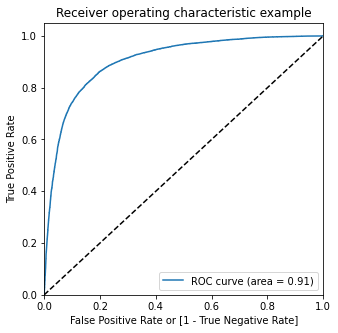

In [110]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Finding Optimal Cut off point

In [111]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.068156,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0.270079,1,0,1,1,1,0,0,0,0,0,0,0
2,0,0.230093,2,0,1,1,1,0,0,0,0,0,0,0
3,0,0.454182,3,0,1,1,1,1,1,0,0,0,0,0
4,0,0.430089,4,0,1,1,1,1,1,0,0,0,0,0


In [112]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.693333  0.977603  0.409063
0.2   0.2  0.767031  0.951109  0.582953
0.3   0.3  0.805371  0.918343  0.692399
0.4   0.4  0.827406  0.881792  0.773019
0.5   0.5  0.831242  0.828805  0.833679
0.6   0.6  0.828002  0.777737  0.878266
0.7   0.7  0.813615  0.713604  0.913625
0.8   0.8  0.778074  0.613387  0.942762
0.9   0.9  0.685945  0.396775  0.975114


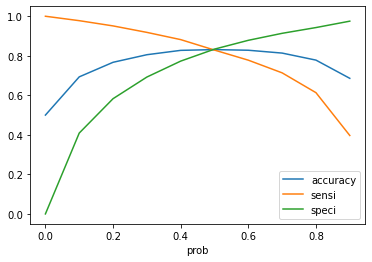

In [113]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### from the above plot, our optimal cut-off is 0.5

### Precision and Recall tradeoff

In [114]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[16080,  3208],
       [ 3302, 15986]], dtype=int64)

In [115]:
#### Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8328644368031677

In [116]:
#### Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8288054749066778

In [117]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8328644368031677

In [118]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8288054749066778

In [119]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

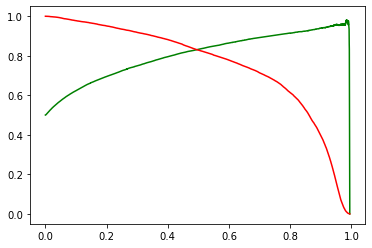

In [120]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Prediction on test set

In [121]:
# Scaling the test data
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,combined_rech_amt_6,combined_rech_amt_7,combined_rech_amt_8,avg_rech_amt_6_7,tenure_mnth
35865,0.404481,0.290814,0.296417,0.362979,0.000000,0.002108,0.041024,0.007884,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.013949,0.000000,0.000000,0.055569,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.038356,0.000000,0.000000,0.921484,0.000000,0.006263,0.050050,0.000000,0.000000,0.0,0.0,0.0,0.235721,0.00000,0.001391,0.0,0.0,0.0,0.000000,0.527264,0.000000,0.0,0.0,0.0,0.149319,0.004347,0.000666,0.096819,0.111106,0.006827,0.056344,0.035218,0.040916,0.007145,0.000000,0.201280,0.058814,0.048888,0.036855,0.00000,0.018307,0.009158,0.240538,0.000000,1.000000,0.0,0.0,0.0,0.138465,0.003667,0.986526,0.064635,0.040325,0.140863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256410,0.358974,0.114286,0.217554,0.079402,0.009625,0.367347,0.102041,0.036765,0.101493,0.054054,0.000000,0.073593,0.108225,0.000000,0.666667,1.0,0.000000,0.0,0.0,0.0,0.689674,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.666667,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.162127,0.436789,0.006536,0.001937,0.026667
41952,0.437589,0.651749,0.546388,0.098426,0.100311,0.062199,0.134027,0.327252,0.166253,0.0,0.0,0.0,0.0,0.0,0.0,0.363819,0.258397,0.206919,0.008042,0.046195,0.066037,0.000000,0.203288,0.062397,0.0,1.0,0.0,0.091796,0.093616,0.091534,0.001981,0.073954,0.000000,0.376795,0.764307,0.477751,0.0,0.0,0.0,0.129990,0.27698,0.159033,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.109997,0.215956,0.113083,1.000000,1.000000,0.969700,0.050092,0.179573,0.099206,0.000000,0.000000,0.000000,0.411440,0.785885,0.291864,1.00000,1.000000,1.000000,1.000000,1.000000,0.837615,0.0,0.0,0.0,1.000000,1.000000,0.893591,0.536886,1.000000,0.332946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.153846,0.307692,0.228571,0.326797,0.352172,0.332050,0.816327,0.612245,0.533088,1.000000,0.464865,0.256410,0.658009,0.627706,0.627706,0.666667,0.0,0.000000,0.0,0.0,0.0,0.232954,0.193819,0.488674,0.150768,1.0,0.546824,0.0,0.0,0.0,0.666667,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.766977,1.0,0.0,0.0,0.621271,0.3

In [122]:
# Feature selection
X_test=X_test[col]
X_test.head()

,onnet_mou_6,offnet_mou_7,loc_og_t2t_mou_8,std_og_t2t_mou_7,std_og_mou_8,loc_ic_t2m_mou_8,total_ic_mou_6,total_rech_num_8,max_rech_amt_7,last_day_rch_amt_8,count_rech_2g_6,vol_2g_mb_8,vol_3g_mb_8,sachet_2g_8,avg_rech_amt_6_7,tenure_mnth
35865,0.362979,0.007884,0.000000,0.000000,0.001391,0.040916,0.064635,0.114286,0.102041,0.000000,0.666667,0.000000,0.000000,0.000000,0.001937,0.026667
41952,0.098426,0.327252,0.206919,0.073954,0.159033,0.099206,0.536886,0.228571,0.612245,0.256410,0.666667,0.488674,0.546824,0.000000,0.253753,0.506667
98938,0.056538,0.348991,0.820103,0.000000,0.000000,1.000000,0.996673,0.400000,1.000000,0.666667,0.000000,1.000000,1.000000,0.000000,0.897337,1.000000
29459,0.348353,0.052481,0.000000,0.000000,0.005918,0.000000,0.023181,0.285714,0.730612,0.789744,0.666667,0.876025,1.000000,1.000000,0.702179,0.040000
70682,0.098379,1.000000,0.427863,0.035471,1.000000,1.000000,0.311881,0.685714,0.448980,0.666667,0.000000,0.000000,0.000000,0.666667,0.425182,0.160000


In [123]:
# Adding constant to the test model.
X_test_SM = stm.add_constant(X_test)

In [124]:
# Target variable prediction
y_test_pred = res15.predict(X_test_SM)
y_pred = pd.DataFrame(y_test_pred)

y_pred=y_pred.rename(columns = {0:"Churn_prob"})

# Converting y_pred to a dataframe which is an array
y_test_df = pd.DataFrame(y_test)

y_pred_final = pd.concat([y_test_df,y_pred],axis=1)

y_pred_final['test_churn_pred'] = y_pred_final.Churn_prob.map(lambda x: 1 if x>0.5 else 0)
y_pred_final.head()

,churn,Churn_prob,test_churn_pred
35865,0,0.874506,1
41952,0,0.298812,0
98938,0,0.004450,0
29459,0,0.105769,0
70682,0,0.034901,0


In [125]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.8229085657149205

In [126]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred )
confusion2

array([[6834, 1438],
       [ 156,  573]], dtype=int64)

In [127]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [128]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7860082304526749

In [129]:
# Let us calculate specificity
TN / float(TN+FP)

0.8261605415860735

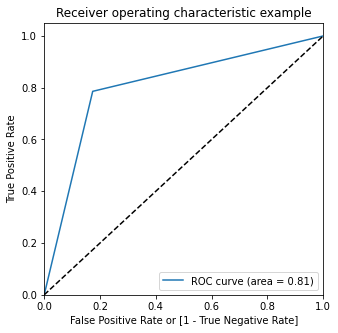

In [130]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.test_churn_pred, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.test_churn_pred)

In [131]:
res_coef.sort_values('coeff')

,features,coeff
6,loc_ic_t2m_mou_8,-2.502670
8,total_rech_num_8,-2.197303
10,last_day_rch_amt_8,-1.848453
13,vol_3g_mb_8,-1.498067
3,loc_og_t2t_mou_8,-1.463126
12,vol_2g_mb_8,-1.462376
5,std_og_mou_8,-0.983863
16,tenure_mnth,-0.673354
11,count_rech_2g_6,-0.618604
9,max_rech_amt_7,-0.423841


### Inference from the Logistic regression Model
- If the duration of incoming call(from different network) decreases the probability of churn increases
- If the number of recharges in 8th month decreases then the probability of churn increases
- If the 3g/2g data usage in 8th month decreases then the probability of churn increases
- If the duration of local/std outgoing call decreases the probability of churn increases
- new customers are likely to churn more

#### relationship of loc_ic_t2m_mou_8, loc_og_t2t_mou_8, std_og_mou_8 with churn are shown in below chart also. As the minutes of duration of Incoming and outgoing calls decreases, the customer is more likely to churn.

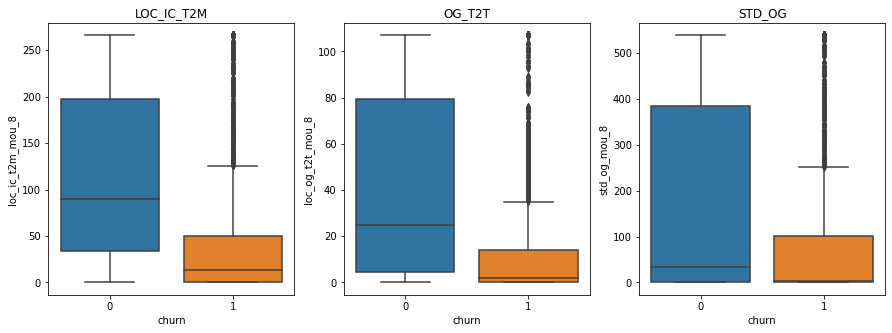

In [132]:
fig,axes = plt.subplots(ncols=3,nrows=1,figsize=(15, 5))
sns.boxplot(high_value_cust.churn, high_value_cust.loc_ic_t2m_mou_8,ax=axes[0])
sns.boxplot(high_value_cust.churn, high_value_cust.loc_og_t2t_mou_8,ax=axes[1])
sns.boxplot(high_value_cust.churn, high_value_cust.std_og_mou_8,ax=axes[2])
axes[0].set_title('LOC_IC_T2M')
axes[1].set_title('OG_T2T')
axes[2].set_title('STD_OG')
plt.show()


#### relationship of total_rech_num_8 with churn is shown in below chart also. the total number of recharges for churners are very less as compared to non-churners

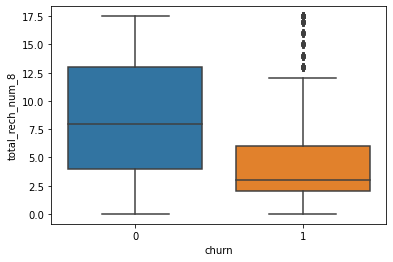

In [133]:
sns.boxplot(high_value_cust.churn, high_value_cust.total_rech_num_8)
plt.show()

#### relationship of vol_3g_mb_8/vol_2g_mb_8 with churn is shown in below chart also. the volume of 3g and 2g data usage for churners are very less as compared to non-churners

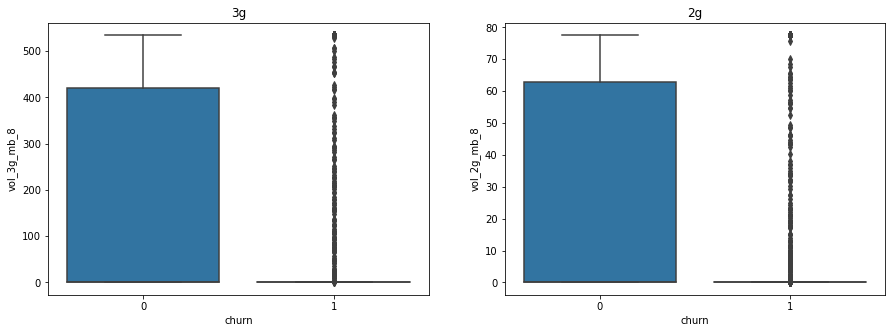

In [134]:
fig,axes = plt.subplots(ncols=2,nrows=1,figsize=(15, 5))
sns.boxplot(high_value_cust.churn, high_value_cust.vol_3g_mb_8,ax=axes[0])
sns.boxplot(high_value_cust.churn, high_value_cust.vol_2g_mb_8,ax=axes[1])
axes[0].set_title('3g')
axes[1].set_title('2g')
plt.show()


## Logistic Regression using PCA

In [135]:
## Test-Train Split
high_value_cust_pca_log = high_value_cust.copy()
X = high_value_cust_pca_log.drop('churn', axis=1)
y = high_value_cust_pca_log['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)
print("X_train size: ", X_train.shape)
print("X_test: ", X_test.shape)

## Scaling the numerical columns
num_cols = high_value_cust_pca_log.select_dtypes('float64').columns.tolist()
scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Class imbalance Handling
sm=SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print("X_train size after SMOTE: ", X_train_sm.shape)
print("y_train size after SMOTE: ", y_train_sm.shape)

X_train size:  (21000, 138)
X_test:  (9001, 138)
X_train size after SMOTE:  (38576, 138)
y_train size after SMOTE:  (38576,)


In [136]:
pca = PCA(random_state=42)
pca.fit(X_train_sm)

PCA(random_state=42)

#### Components from PCA

In [137]:
pca.components_

array([[ 6.64859665e-02,  9.26389323e-02,  9.92755189e-02, ...,
         8.78590405e-02,  2.58235433e-02,  5.69658868e-02],
       [-3.92968885e-02, -2.47573202e-02,  2.56346132e-02, ...,
         7.89345783e-02,  5.31369785e-02,  7.06252458e-02],
       [-6.49892192e-02,  3.72120366e-02,  9.43324167e-02, ...,
         1.90906254e-01,  1.24917477e-01, -3.71820461e-02],
       ...,
       [-0.00000000e+00, -1.57901374e-18,  3.76603121e-18, ...,
        -3.90464818e-18, -3.08171264e-18,  1.28273546e-18],
       [-0.00000000e+00, -1.94310787e-19,  3.02040240e-19, ...,
        -4.96802877e-19,  4.01903248e-19, -2.08844686e-20],
       [ 0.00000000e+00,  4.10334029e-16,  2.25693789e-16, ...,
        -6.11490025e-17, -5.20417043e-17,  1.28369537e-16]])

#### Making a scree plot for the explained variance

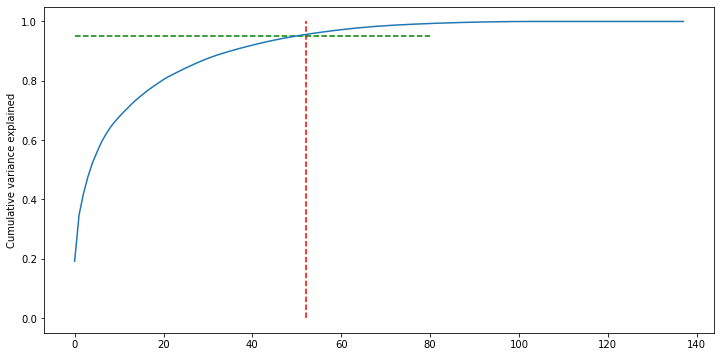

In [138]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[12,6])
plt.vlines(x=52, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=80, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Perform PCA with 52 components as it explains 95% of the variance

In [139]:
pca_final = IncrementalPCA(n_components=52)
df_train_pca = pca_final.fit_transform(X_train_sm)

#### Applying the transformation on the test set

In [140]:
df_test_pca = pca_final.transform(X_test)

### Applying Logistic regression on the data after PCA

In [141]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca, y_train_sm)

## Making predictions on the test set
y_pred = model_pca.predict(df_test_pca)
pred_probs_test = model_pca.predict_proba(df_test_pca)

"{:2.2}".format(metrics.accuracy_score(y_test, y_pred))

'0.83'

In [142]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & pred_probs_test\n",confusion_matrix(y_test,y_pred),"\n")

Confusion Matirx for y_test & pred_probs_test
 [[6886 1386]
 [ 153  576]] 



In [143]:
confusion_pca_log = confusion_matrix(y_test,y_pred)
TP = confusion_pca_log[1,1] # true positive 
TN = confusion_pca_log[0,0] # true negatives
FP = confusion_pca_log[0,1] # false positives
FN = confusion_pca_log[1,0] # false negatives

In [144]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7901234567901234

In [145]:
# Let us calculate specificity
TN / float(TN+FP)

0.8324468085106383

In [146]:
#### Precision
confusion_pca_log[1,1]/(confusion_pca_log[0,1]+confusion_pca_log[1,1])

0.29357798165137616

In [147]:
#### Recall
confusion_pca_log[1,1]/(confusion_pca_log[1,0]+confusion_pca_log[1,1])

0.7901234567901234

### Unsupervised Logistic regression

In [148]:
pca_unsup = PCA(0.95)
df_train_pca2 = pca_unsup.fit_transform(X_train_sm)
df_train_pca2.shape

(38576, 51)

#### Following it up with logistic regression model

In [149]:
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2, y_train_sm)

## Making predictions on the test set
df_test_pca2 = pca_unsup.transform(X_test)
y_pred2 = model_pca2.predict(df_test_pca2)
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]

"{:2.2}".format(metrics.accuracy_score(y_test, y_pred2))

'0.83'

In [150]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & pred_probs_test\n",confusion_matrix(y_test,y_pred2),"\n")

Confusion Matirx for y_test & pred_probs_test
 [[6897 1375]
 [ 149  580]] 



### Applying Random Forest on the data after PCA

In [151]:
rf = RandomForestClassifier(random_state=100, n_jobs=-1)

In [152]:
params = {
    'max_depth': [2,3,5,10,20,50],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [153]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [154]:
%%time
grid_search.fit(df_train_pca, y_train_sm)

Fitting 4 folds for each of 144 candidates, totalling 576 fits
Wall time: 16min 10s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 50],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [155]:
grid_search.best_score_

0.9458730817088346

In [156]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=50, min_samples_leaf=5, n_jobs=-1,
                       random_state=100)

In [157]:
# predict churn on test data
y_pred = grid_search.predict(df_test_pca)

# create onfusion matrix
cm_rf = confusion_matrix(y_test, y_pred)
print(cm_rf)

TP = cm_rf[1,1] # true positive 
TN = cm_rf[0,0] # true negatives
FP = cm_rf[0,1] # false positives
FN = cm_rf[1,0] # false negatives

# Let's see the sensitivity, specificity of our random forest model
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
print("Sensitivity: \t", sensitivity, "\n", "Specificity: \t", round(specificity, 2), sep='')

[[7847  425]
 [ 356  373]]
Sensitivity: 	0.5116598079561042
Specificity: 	0.95


#### Sensitivity is not good for random forest

### Applying Decision Tree on the data after PCA

In [158]:
dt = DecisionTreeClassifier(random_state=100)

In [159]:
params_dt = {
    "max_depth": [2,3,5,10,20,30,50],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [160]:
grid_search_dt = GridSearchCV(estimator=dt,
                           param_grid=params_dt,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [161]:
%%time
grid_search_dt.fit(df_train_pca, y_train_sm)

Fitting 4 folds for each of 42 candidates, totalling 168 fits
Wall time: 1min 28s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 50],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [162]:
grid_search_dt.best_score_

0.8719670261302364

In [163]:
dt_best = grid_search_dt.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=100)

In [164]:
# predict churn on test data
y_pred = grid_search_dt.predict(df_test_pca)

# create onfusion matrix
cm_dt = confusion_matrix(y_test, y_pred)
print(cm_dt)

TP = cm_dt[1,1] # true positive 
TN = cm_dt[0,0] # true negatives
FP = cm_dt[0,1] # false positives
FN = cm_dt[1,0] # false negatives

# Let's see the sensitivity, specificity of our random forest model
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
print("Sensitivity: \t", sensitivity, "\n", "Specificity: \t", round(specificity, 2), sep='')

[[7137 1135]
 [ 320  409]]
Sensitivity: 	0.5610425240054869
Specificity: 	0.86


#### Sensitivity is not good for decision tree

### Which Model should be chosen to predict the churners
I would select Logistic regression model with PCA as it is good accuracy and comparatively higher sensitivity. Here we are more concerned about finding true Churners, hence sensitivity is the evaluation metric to be used.

Accuracy scores:
- Logistic Regression - .83
- Random Forest - .94
- Decision Tree - .87

Sensitivity:
- Logistic Regression - .79
- Random Forest - .51
- Decision Tree - .56

## Recommendation to manage customer churn
As we can see that the call rates and data usage are the strongest predictors for churn. Hence, recommedations are:

- Watch over the decrease in the call and data usage and if there is significant drop then come up with some offers on 2g/3g/local-std-isd call rates or some free minutes of calls
- As newer customers are likely to churn more as compared to older customers, the offers should be based on tenure of the customers also to retain new customers